In [1]:
%load_ext autoreload
%autoreload 2
import ibmdata
import math
import create_wafermap_signatures as cws

def parabola(exp = 2, rotate = 0, yoffset=7, xoffset=5):
    x = "unitcell_x"
    y = "unitcell_y"
    return f"{x}==floor(abs({y}+({yoffset})) ** ({exp})) + ({xoffset})"
    

pattlist = {
    "good"           :"""radius_center_5.isin(['Z'])""",
    "all"            :"""radius_center_5.isin(['A','B','C','D','E'])""",
    "A"              :"""radius_center_5.isin(['A'])""",
    "B"              :"""radius_center_5.isin(['B'])""",
    "C"              :"""radius_center_5.isin(['C'])""",
    "D"              :"""radius_center_5.isin(['D'])""",
    "E"              :"""radius_center_5.isin(['E'])""",
    "center"         :"""radius_center_5.isin(['A','B'])""",
    "edge"           :"""radius_center_5.isin(['D','E'])""",
    "bottom_4"       :"""unitcell_y < 6""",
    "cde_bottom"     :"""radius_center_5.isin(['C','D','E']) & quadrant.isin(['3','4'])""",
    "e_bottom"       :"""radius_center_5.isin(['E']) & quadrant.isin(['3','4'])""",
    "diag_scratch"   :"""unitcell_y==unitcell_x | unitcell_y==unitcell_x+1 | unitcell_y==unitcell_x-1""",
    "r_diag_scratch" :"""unitcell_y==15-unitcell_x | unitcell_y==15-unitcell_x+1 | unitcell_y==15-unitcell_x-1""",
    #"diag_scratch"   :"""unitcell_y==unitcell_x""",
    #"r_diag_scratch" :"""unitcell_y==15-unitcell_x""",
    #"crescent"       :"""unitcell_x==floor((unitcell_y-5) ** (2/3))+3 | unitcell_x==floor((unitcell_y-5) ** (2/3))+4 | unitcell_x==floor((unitcell_y-5) ** (2/3))+5""",
    "crescent"       :"""unitcell_x==floor(abs(unitcell_y-7) ** (3/4))+5""",
}
signaturelist = {
    "good"               :{"wafer_count":100,"signature":[[pattlist["good"],[0,1]]]},
    "center_expanding"   :{"wafer_count":20,"signature":[[pattlist["A"],[20,50]],[pattlist["B"],[10,20]],[pattlist["C"],[5,10]],[pattlist["D"],[0,5]]]},
    "bottom_arc_wafer"   :{"wafer_count":20,"signature":[[pattlist["cde_bottom"],[5,20]]]},
    "bottom_wafer"       :{"wafer_count":20,"signature":[[pattlist["all"],[0,2]],[pattlist["bottom_4"],[5,20]]]},
    "center_only"        :{"wafer_count":20,"signature":[[pattlist["A"],[10,20]],[pattlist["B"],[0,15]]]},
    "scratch"            :{"wafer_count":20,"signature":[[pattlist["diag_scratch"],[10,20]]]},
    "rscratch"           :{"wafer_count":20,"signature":[[pattlist["r_diag_scratch"],[10,20]]]},
    "crescent"           :{"wafer_count":20,"signature":[[pattlist["crescent"],[10,20]]]},
}
geo = cws.get_geo("zadd2")
#debugmaps = cws.create_wafermap(geo,signaturelist,missingrange=[0,20],outlierrange=[0,2],outliervals=[200,250])
debugmaps = cws.create_wafermap(geo,signaturelist)
debugmaps.to_csv("debugmaps.csv",index=False)

[<AxesSubplot:title={'center':'wafer-121'}>,
 <AxesSubplot:title={'center':'wafer-122'}>,
 <AxesSubplot:title={'center':'wafer-123'}>,
 <AxesSubplot:title={'center':'wafer-141'}>,
 <AxesSubplot:title={'center':'wafer-142'}>,
 <AxesSubplot:title={'center':'wafer-143'}>,
 <AxesSubplot:title={'center':'wafer-101'}>,
 <AxesSubplot:title={'center':'wafer-102'}>,
 <AxesSubplot:title={'center':'wafer-103'}>,
 <AxesSubplot:title={'center':'wafer-161'}>,
 <AxesSubplot:title={'center':'wafer-162'}>,
 <AxesSubplot:title={'center':'wafer-163'}>,
 <AxesSubplot:title={'center':'wafer-221'}>,
 <AxesSubplot:title={'center':'wafer-222'}>,
 <AxesSubplot:title={'center':'wafer-223'}>,
 <AxesSubplot:title={'center':'wafer-1'}>,
 <AxesSubplot:title={'center':'wafer-10'}>,
 <AxesSubplot:title={'center':'wafer-100'}>,
 <AxesSubplot:title={'center':'wafer-201'}>,
 <AxesSubplot:title={'center':'wafer-202'}>,
 <AxesSubplot:title={'center':'wafer-203'}>,
 <AxesSubplot:title={'center':'wafer-181'}>,
 <AxesSubplot

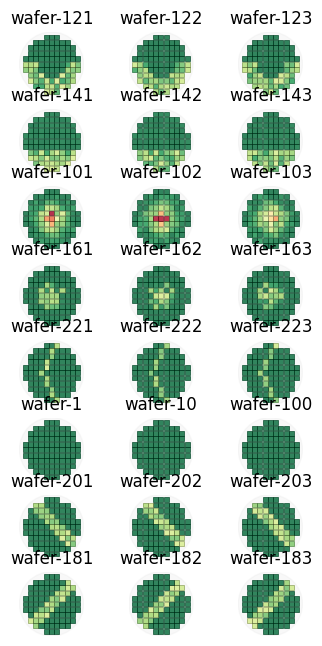

In [2]:
from ibmdata.plot.wafermap import wafermap, wafermap_gallery, WafermapConfig
import pandas as pd
import matplotlib as mpl
inputdf = pd.read_csv("debugmaps.csv")
maps = []
columns = 3
for sig, sigdf in inputdf.groupby(['signature']):
    wafcnt = 0
    for waf, wafdf in sigdf.groupby(['wafer_id']):
        if wafcnt >= columns:
            break
        maps.append(wafdf)
        wafcnt = wafcnt + 1
filldf = pd.concat(maps)
width = 400
height = 800
display(
    wafermap_gallery(
        WafermapConfig(
            filldf, 
            chipx_column='normalized_testx', 
            chipy_column='normalized_testy', 
            color_by_column='value', 
            colormap = mpl.cm.RdYlGn.reversed(),
            #discrete=True, 
            title=f"wafermaps",
            #plot_type='plotly',
            plot_type='mpl',
            width=width,
            height=height,
            show_kerf_borders=False
        ), 
        wafer_column='wafer_id',
        columns = columns
    )
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_omp(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_omp.py:419: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  out = _cholesky_o

Summary


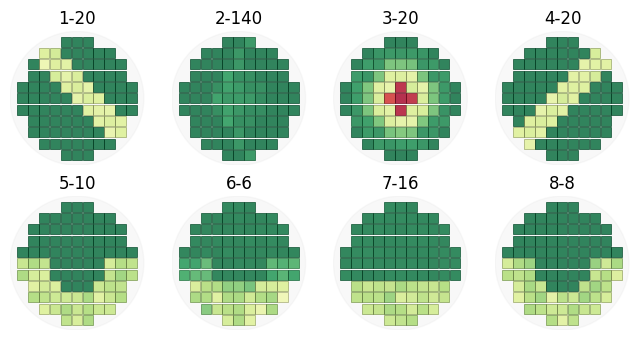

Samples


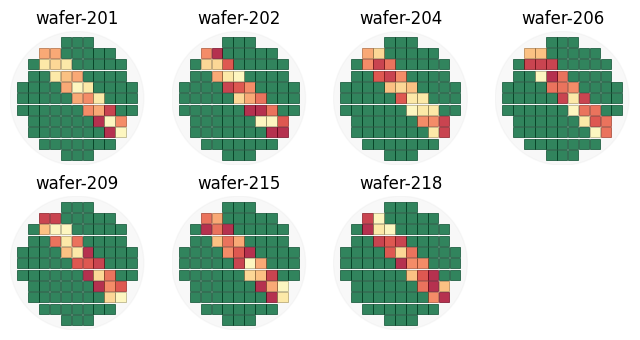

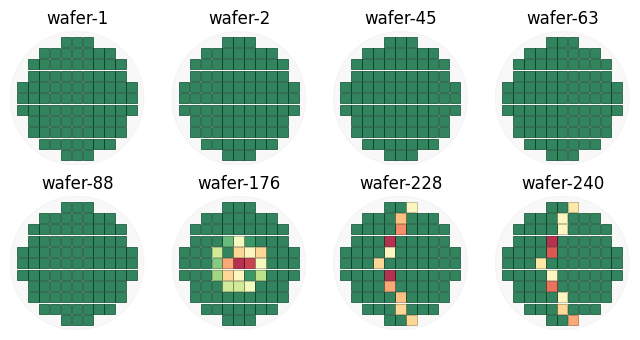

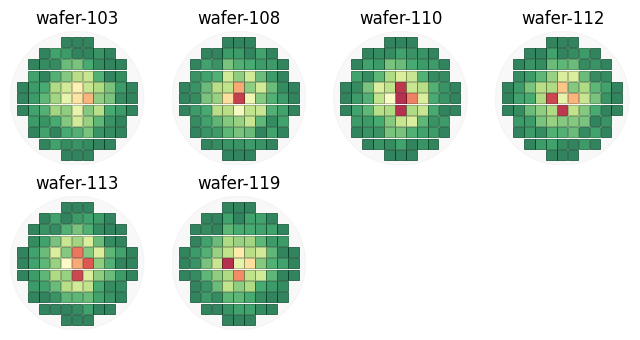

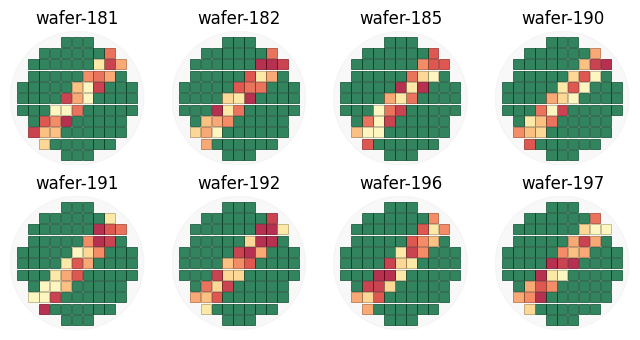

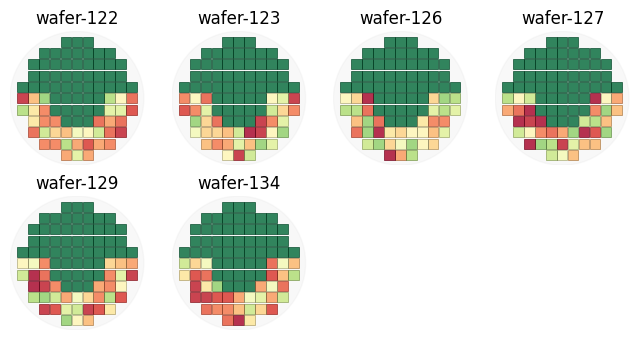

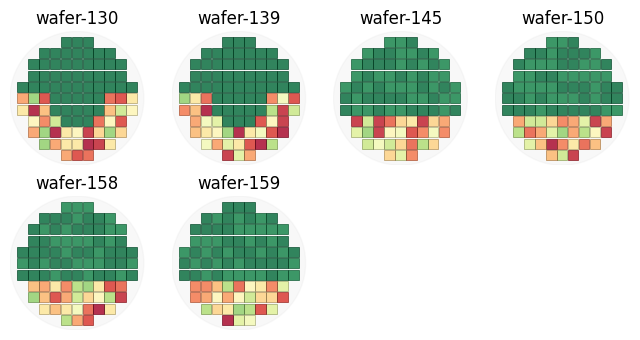

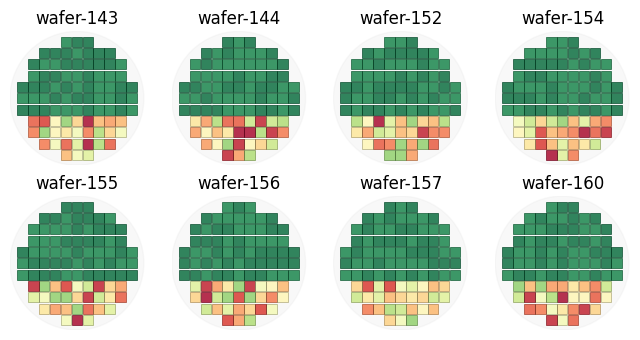

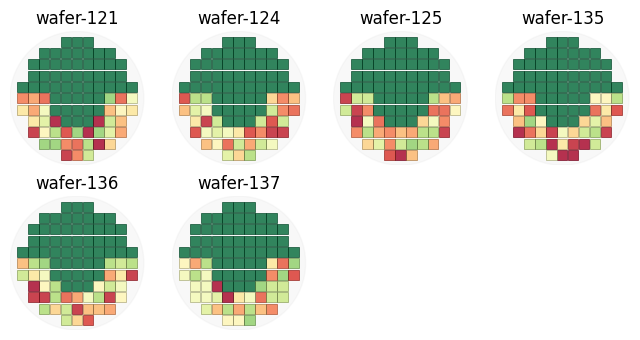

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import pteClustering as ptec
import warnings
#warnings.filterwarnings("ignore")
warnings.filterwarnings("once")
#warnings.filterwarnings("error")
#ibmdata.set_log_level(ibmdata.logging.INFO)
ibmdata.set_log_level(ibmdata.logging.DEBUG)

#pulldf = pd.read_csv("p10_za_wft_sram_dbc_fails.csv")
pulldf = pd.read_csv("debugmaps.csv")
failcol = 'value'
wafx = 'unitcell_x'
wafy = 'unitcell_y'
interpolate_wmap = False
t = 100
critereon = 'distance' # inconsistent, distance, maxclust, monocrit, maxclust_monocrit
t = 8
critereon = 'maxclust'

ptec.runRobustFeatureExtraction(pulldf, failcol, t, critereon, wafx, wafy, interpolate_wmap)


In [11]:

ptec.debug.debugdict['results']

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 5, 5, 8, 8, 5, 5, 5, 5, 6, 5, 8,
       5, 5, 8, 8, 8, 5, 6, 8, 7, 7, 7, 7, 6, 7, 7, 7, 7, 6, 7, 7, 7, 7,
       7, 7, 7, 6, 6, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)